In [1]:
#날짜를 데이터타임으로
#탑 3위 % (top3/전체)

#시간대별로 묶는 것 시각화! 
#target = min max

#업종 날짜별로 정리
#업종 중 max 값을 타깃 값으로 바꾸고

In [2]:
# 시리어스 데이터를 종합해서 데이터프레임 데이터로 재구축 필요
# Groupby로 묶어서 진행 필요
# 데이터 프레임을 만들기 위해서는 [[]] 이중으로 묶을 필요가 있다.
# 머신러닝에서는 수치형 데이터밖에 적용이 되지 않기 때문에 범주형 데이터로 만들 필요가 있다.
# 광역 도시명은 현재는 빼고 진행


#(완료)
# target 값은 1 (한식), 2 (분식) 3(카페/디저트), 4(돈까스/일식), 5(회), 6(치킨), 7(피자), 8(아시안/양식), 9(중식), 10(족발/보쌈)
# 11(야식), 12(찜탕), 13(도시락), 14(패스트푸트)로 만들어줄 필요가 있다.
# max min 값으로 진행


# import 정의

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 삽입

In [4]:
delivery_data = pd.read_csv('datasets/deliverydata_real_final.csv', encoding='utf-8')

# 데이터 탐색

In [5]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37853 entries, 0 to 37852
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   광역시도명    37853 non-null  object 
 1   시군구명     37853 non-null  object 
 2   날짜       37853 non-null  object 
 3   시간대별 시간  37853 non-null  int64  
 4   강수 유형명   37853 non-null  object 
 5   습도값      37853 non-null  int64  
 6   강수량 값    37853 non-null  float64
 7   기온값      37853 non-null  float64
 8   풍속값      37853 non-null  float64
 9   한식       37853 non-null  int64  
 10  분식       37853 non-null  int64  
 11  카페/디저트   37853 non-null  int64  
 12  돈까스/일식   37853 non-null  int64  
 13  회        37853 non-null  int64  
 14  치킨       37853 non-null  int64  
 15  피자       37853 non-null  int64  
 16  아시안/양식   37853 non-null  int64  
 17  중식       37853 non-null  int64  
 18  족발/보쌈    37853 non-null  int64  
 19  야식       37853 non-null  int64  
 20  찜탕       37853 non-null  int64  
 21  도시락      378

In [6]:
delivery_data

,광역시도명,시군구명,날짜,시간대별 시간,강수 유형명,습도값,강수량 값,기온값,풍속값,한식,...,회,치킨,피자,아시안/양식,중식,족발/보쌈,야식,찜탕,도시락,패스트푸드
0,서울특별시,강북구,2020-01-01,0,없음,84,0.0,-4.3,0.6,0,...,0,9,0,0,0,0,0,0,0,0
1,서울특별시,강북구,2020-01-01,10,없음,72,0.0,0.2,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,서울특별시,강북구,2020-01-01,11,없음,73,0.0,0.0,0.4,0,...,0,0,0,0,0,0,0,0,0,0
3,서울특별시,강북구,2020-01-01,12,없음,74,0.0,-0.2,0.7,0,...,0,0,0,0,0,0,0,0,0,0
4,서울특별시,강북구,2020-01-01,13,없음,75,0.0,0.0,0.5,0,...,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37848,서울특별시,은평구,2020-07-31,20,비,96,1.5,23.8,0.8,9,...,1,13,0,0,0,6,0,0,0,4
37849,서울특별시,은평구,2020-07-31,21,비,96,0.0,24.1,0.6,4,...,5,10,0,0,0,7,0,0,0,3
37850,서울특별시,은평구,2020-07-31,22,없음,96,0.0,24.4,1.1,6,...,4,13,0,0,0,0,0,0,0,0
37851,서울특별시,은평구,2020-07-31,23,없음,95,0.0,24.9,1.4,3,...,5,10,0,0,0,2,0,0,0,0


### :: 날짜 Object -> Datetime으로 변경

In [7]:
delivery_data['날짜'] = delivery_data['날짜'].apply(pd.to_datetime)

In [8]:
delivery_data.info() #datetime62 변경 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37853 entries, 0 to 37852
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   광역시도명    37853 non-null  object        
 1   시군구명     37853 non-null  object        
 2   날짜       37853 non-null  datetime64[ns]
 3   시간대별 시간  37853 non-null  int64         
 4   강수 유형명   37853 non-null  object        
 5   습도값      37853 non-null  int64         
 6   강수량 값    37853 non-null  float64       
 7   기온값      37853 non-null  float64       
 8   풍속값      37853 non-null  float64       
 9   한식       37853 non-null  int64         
 10  분식       37853 non-null  int64         
 11  카페/디저트   37853 non-null  int64         
 12  돈까스/일식   37853 non-null  int64         
 13  회        37853 non-null  int64         
 14  치킨       37853 non-null  int64         
 15  피자       37853 non-null  int64         
 16  아시안/양식   37853 non-null  int64         
 17  중식       37853 non-null  int64 

### :: target 데이터 분리 및 정제

In [9]:
delivery_target = delivery_data[['한식','분식','카페/디저트','돈까스/일식','회','치킨','피자','아시안/양식','중식','족발/보쌈','야식','찜탕','도시락','패스트푸드']]

In [10]:
delivery_target

,한식,분식,카페/디저트,돈까스/일식,회,치킨,피자,아시안/양식,중식,족발/보쌈,야식,찜탕,도시락,패스트푸드
0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
1,0,4,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37848,9,5,0,5,1,13,0,0,0,6,0,0,0,4
37849,4,1,0,1,5,10,0,0,0,7,0,0,0,3
37850,6,0,4,0,4,13,0,0,0,0,0,0,0,0
37851,3,0,0,1,5,10,0,0,0,2,0,0,0,0


In [11]:
# 데이터의 총 량
delivery_length = len(delivery_target.values)

In [12]:
# 데이터 프레임 생성
index_value = [ i for i in range(delivery_length)]
target_data = pd.DataFrame(columns=['최다 업종'],index=[index_value])

In [13]:
#1 (한식), 2 (분식) 3(카페/디저트), 4(돈까스/일식), 5(회), 6(치킨), 7(피자), 8(아시안/양식), 9(중식), 10(족발/보쌈)
# 11(야식), 12(찜탕), 13(도시락), 14(패스트푸트)
# 최대 배달 기준 값으로 데이터프레임 값 채우기

for i in range(delivery_length):
    name = delivery_target.loc[i][(delivery_target.loc[i].values == delivery_target.loc[i].max())].index[0]
    if name == '한식':
        target_data.loc[i] = [1]
    elif name == '분식':
        target_data.loc[i] = [2]
    elif name == '카페/디저트':
        target_data.loc[i] = [3]
    elif name == '돈까스/일식':
        target_data.loc[i] = [4]
    elif name == '회':
        target_data.loc[i] = [5]
    elif name == '치킨':
        target_data.loc[i] = [6]
    elif name == '피자':
        target_data.loc[i] = [7]
    elif name == '아시안/양식':
        target_data.loc[i] = [8]
    elif name == '중식':
        target_data.loc[i] = [9]
    elif name == '족발/보쌈':
        target_data.loc[i] = [10]
    elif name == '야식':
        target_data.loc[i] = [11]
    elif name == '찜탕':
        target_data.loc[i] = [12]    
    elif name == '도시락':
        target_data.loc[i] = [13]
    elif name == '패스트푸드':
        target_data.loc[i] = [14]

In [14]:
target_data

,최다 업종
0,6
1,2
2,2
3,2
4,7
...,...
37848,6
37849,6
37850,6
37851,6


### 데이터 정제

In [15]:
# 광역시도명 제외
# 시군구명 (23개) 강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 동대문구 동작구 마포구 서대문고 서초구 성동구 성북구 송파구 양천구 영등포구 
# 용산구, 은평구, 종로구. 중구, 중랑구
# 1차적으로는 레이블링 인코딩을 진행! 너무 양이 많다.

# 강수 유형 명 (비(눈,진눈꺠비)), 없음 
# 바람 강도 유형명 (1,0)


#동쪽 서쪽 바람, 풍향 카테고리 제거 

In [16]:
delivery_data['강수 유형명'].loc[1]

'없음'

*- 강수 유형 명 없음(0), 비,눈,진눈깨비(1) 변경*

In [17]:
for i in range(delivery_length):
    if delivery_data['강수 유형명'].loc[i] == '없음' or delivery_data['강수 유형명'].loc[i] == 0:
        delivery_data['강수 유형명'].loc[i] = 0
    else:
        delivery_data['강수 유형명'].loc[i] = 1

/var/folders/t9/hcqp6kl96yb7ggw4dcwms1wh0000gn/T/ipykernel_10502/3596115009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_data['강수 유형명'].loc[i] = 0
/var/folders/t9/hcqp6kl96yb7ggw4dcwms1wh0000gn/T/ipykernel_10502/3596115009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_data['강수 유형명'].loc[i] = 1


*시군구명 레이블 인코딩 진행*
- 1. 강남구
- 2. 강동구
- 3. 강북구
- 4. 강서구
- 5. 관악구
- 6. 광진구
- 7. 구로구
- 8. 금천구
- 9. 동대문구
- 10. 동작구
- 11. 마포구
- 12. 서대문고
- 13. 서초구
- 14. 성동구
- 15. 성북구
- 16. 송파구
- 17. 양천구
- 18. 영등포구
- 19. 용산구
- 20. 은평구
- 21. 종로구
- 22. 중구
- 23. 중랑구

In [18]:
for i in range(delivery_length):
    if delivery_data['시군구명'].loc[i] == '강남구':
        delivery_data['시군구명'].loc[i] = 1
    elif delivery_data['시군구명'].loc[i] == '강남구':
        delivery_data['시군구명'].loc[i] = 2
    elif delivery_data['시군구명'].loc[i] == '강북구':
        delivery_data['시군구명'].loc[i] = 3
    elif delivery_data['시군구명'].loc[i] == '강서구':
        delivery_data['시군구명'].loc[i] = 4
    elif delivery_data['시군구명'].loc[i] == '관악구':
        delivery_data['시군구명'].loc[i] = 5
    elif delivery_data['시군구명'].loc[i] == '광진구':
        delivery_data['시군구명'].loc[i] = 6
    elif delivery_data['시군구명'].loc[i] == '구로구':
        delivery_data['시군구명'].loc[i] = 7
    elif delivery_data['시군구명'].loc[i] == '금천구':
        delivery_data['시군구명'].loc[i] = 8
    elif delivery_data['시군구명'].loc[i] == '동대문구':
        delivery_data['시군구명'].loc[i] = 9
    elif delivery_data['시군구명'].loc[i] == '동작구':
        delivery_data['시군구명'].loc[i] = 10
    elif delivery_data['시군구명'].loc[i] == '마포구':
        delivery_data['시군구명'].loc[i] = 11
    elif delivery_data['시군구명'].loc[i] == '서대문고':
        delivery_data['시군구명'].loc[i] = 12
    elif delivery_data['시군구명'].loc[i] == '서초구':
        delivery_data['시군구명'].loc[i] = 13
    elif delivery_data['시군구명'].loc[i] == '성동구':
        delivery_data['시군구명'].loc[i] = 14
    elif delivery_data['시군구명'].loc[i] == '성북구':
        delivery_data['시군구명'].loc[i] = 15
    elif delivery_data['시군구명'].loc[i] == '송파구':
        delivery_data['시군구명'].loc[i] = 16
    elif delivery_data['시군구명'].loc[i] == '양천구':
        delivery_data['시군구명'].loc[i] = 17
    elif delivery_data['시군구명'].loc[i] == '영등포구':
        delivery_data['시군구명'].loc[i] = 18
    elif delivery_data['시군구명'].loc[i] == '용산구':
        delivery_data['시군구명'].loc[i] = 19
    elif delivery_data['시군구명'].loc[i] == '은평구':
        delivery_data['시군구명'].loc[i] = 20
    elif delivery_data['시군구명'].loc[i] == '종로구':
        delivery_data['시군구명'].loc[i] = 21
    elif delivery_data['시군구명'].loc[i] == '중구':
        delivery_data['시군구명'].loc[i] = 22
    elif delivery_data['시군구명'].loc[i] == '중랑구':
        delivery_data['시군구명'].loc[i] = 23

/var/folders/t9/hcqp6kl96yb7ggw4dcwms1wh0000gn/T/ipykernel_10502/4047113917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_data['시군구명'].loc[i] = 3
/var/folders/t9/hcqp6kl96yb7ggw4dcwms1wh0000gn/T/ipykernel_10502/4047113917.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_data['시군구명'].loc[i] = 4
/var/folders/t9/hcqp6kl96yb7ggw4dcwms1wh0000gn/T/ipykernel_10502/4047113917.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [19]:
delivery_data

,광역시도명,시군구명,날짜,시간대별 시간,강수 유형명,습도값,강수량 값,기온값,풍속값,한식,...,회,치킨,피자,아시안/양식,중식,족발/보쌈,야식,찜탕,도시락,패스트푸드
0,서울특별시,3,2020-01-01,0,0,84,0.0,-4.3,0.6,0,...,0,9,0,0,0,0,0,0,0,0
1,서울특별시,3,2020-01-01,10,0,72,0.0,0.2,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,서울특별시,3,2020-01-01,11,0,73,0.0,0.0,0.4,0,...,0,0,0,0,0,0,0,0,0,0
3,서울특별시,3,2020-01-01,12,0,74,0.0,-0.2,0.7,0,...,0,0,0,0,0,0,0,0,0,0
4,서울특별시,3,2020-01-01,13,0,75,0.0,0.0,0.5,0,...,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37848,서울특별시,20,2020-07-31,20,1,96,1.5,23.8,0.8,9,...,1,13,0,0,0,6,0,0,0,4
37849,서울특별시,20,2020-07-31,21,1,96,0.0,24.1,0.6,4,...,5,10,0,0,0,7,0,0,0,3
37850,서울특별시,20,2020-07-31,22,0,96,0.0,24.4,1.1,6,...,4,13,0,0,0,0,0,0,0,0
37851,서울특별시,20,2020-07-31,23,0,95,0.0,24.9,1.4,3,...,5,10,0,0,0,2,0,0,0,0


In [20]:
delivery_data.columns

Index(['광역시도명', '시군구명', '날짜', '시간대별 시간', '강수 유형명', '습도값', '강수량 값', '기온값',
       '풍속값', '한식', '분식', '카페/디저트', '돈까스/일식', '회', '치킨', '피자', '아시안/양식', '중식',
       '족발/보쌈', '야식', '찜탕', '도시락', '패스트푸드'],
      dtype='object')

### :: 필요 컬럼만 가져오기

In [21]:
delivery_data = delivery_data.loc[:,['시군구명','날짜','시간대별 시간','강수 유형명','습도값','강수량 값','기온값','풍속값']]

### :: target 값 추가

In [81]:
delivery_data['최다 업종'] = target_data['최다 업종'].values

In [82]:
delivery_data

,시군구명,날짜,시간대별 시간,강수 유형명,습도값,강수량 값,기온값,풍속값,최다 업종
0,3,2020-01-01,0,0,84,0.0,-4.3,0.6,6
1,3,2020-01-01,10,0,72,0.0,0.2,1.0,2
2,3,2020-01-01,11,0,73,0.0,0.0,0.4,2
3,3,2020-01-01,12,0,74,0.0,-0.2,0.7,2
4,3,2020-01-01,13,0,75,0.0,0.0,0.5,7
...,...,...,...,...,...,...,...,...,...
37848,20,2020-07-31,20,1,96,1.5,23.8,0.8,6
37849,20,2020-07-31,21,1,96,0.0,24.1,0.6,6
37850,20,2020-07-31,22,0,96,0.0,24.4,1.1,6
37851,20,2020-07-31,23,0,95,0.0,24.9,1.4,6


### :: 데이터 분리 train_data

In [89]:
delivery_data.columns = ['city', 'datetime', 'hour', 'rain', 'humidity', 'precipitation', 'temp', 'windspeed','sectors']

In [90]:
delivery_data

,city,datetime,hour,rain,humidity,precipitation,temp,windspeed,sectors
0,3,2020-01-01,0,0,84,0.0,-4.3,0.6,6
1,3,2020-01-01,10,0,72,0.0,0.2,1.0,2
2,3,2020-01-01,11,0,73,0.0,0.0,0.4,2
3,3,2020-01-01,12,0,74,0.0,-0.2,0.7,2
4,3,2020-01-01,13,0,75,0.0,0.0,0.5,7
...,...,...,...,...,...,...,...,...,...
37848,20,2020-07-31,20,1,96,1.5,23.8,0.8,6
37849,20,2020-07-31,21,1,96,0.0,24.1,0.6,6
37850,20,2020-07-31,22,0,96,0.0,24.4,1.1,6
37851,20,2020-07-31,23,0,95,0.0,24.9,1.4,6


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'precipitation'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'windspeed'}>]], dtype=object)

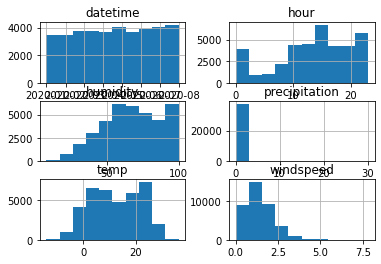

In [91]:
delivery_data.hist()

### :: 날짜를 인덱스로 추가

array([[<AxesSubplot:title={'center':'날짜'}>,
        <AxesSubplot:title={'center':'시간대별 시간'}>],
       [<AxesSubplot:title={'center':'습도값'}>,
        <AxesSubplot:title={'center':'강수량 값'}>],
       [<AxesSubplot:title={'center':'기온값'}>,
        <AxesSubplot:title={'center':'풍속값'}>]], dtype=object)

/Users/jeonjeonghun/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeonjeonghun/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeonjeonghun/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeonjeonghun/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeonjeonghun/.pyenv/versions/anaconda3-2022.05/lib/python3

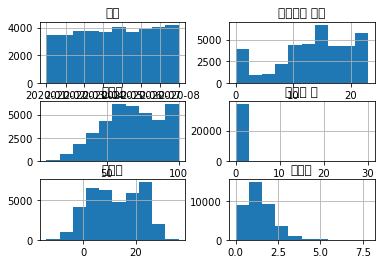

In [88]:
delivery_data.hist()

In [23]:
#delivery_data.set_index(delivery_data['날짜'], inplace=True)

In [ ]:
df.columns = ['col', 'col', 'col']